In [232]:
import scipy as sp
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [242]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
import matplotlib.pyplot as plt

(array([ 27.,  83., 148., 182., 239., 154.,  98.,  57.,  10.,   2.]),
 array([0.00593651, 0.12025389, 0.23457128, 0.34888866, 0.46320605,
        0.57752343, 0.69184082, 0.80615821, 0.92047559, 1.03479298,
        1.14911036]),
 <BarContainer object of 10 artists>)

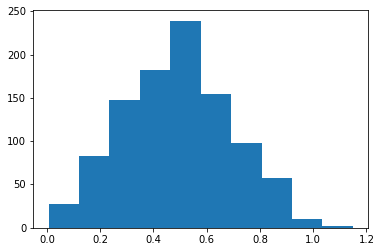

In [316]:
plt.hist(slope)

In [8]:
Path("json.json").parent

PosixPath('.')

In [38]:
import json
import numpy as np
import pandas as pd
from pathlib import Path


np.random.seed(666)

def create_fake_data(num_sample:int=50, num_rep:int = 5):
    """create fake tsv files and a fake json file that minics LIMS query result; each tsv file is coresponding to one sample.  """
    
    def _activity(x, a, b, e):
        return a*x + b + e
    
    def _retrive_sample():
        for sample in df_raw.groupby('sample'):
            yield sample

    temp_path = Path("tmp")
    temp_path.mkdir(parents=True, exist_ok=True)    
    
    ph = (np.random.normal(loc = 0, scale = 0.2,size = num_sample*num_rep*2)+7)
    slope = np.random.normal(loc = 0.5, scale = 0.2,size = num_sample)
    factor = np.array([1]*num_rep + [0]*num_rep)
    intercept = np.transpose(np.random.gamma(shape = 1.2, scale = 5, size = num_sample*num_rep*2).reshape(num_sample,num_rep*2)*factor)
    error = np.random.normal(loc = 0, scale = 0.5,size = num_sample*num_rep*2).reshape(num_rep*2,num_sample) + 3
    
    df_raw = pd.DataFrame(_activity(x = ph.reshape(num_rep*2,num_sample), a = slope, b = intercept, e = error), index = factor, columns = [f"smaple{i+1}" for i in range(num_sample)]).stack().reset_index()
    df_raw.columns = ["treatment", "sample","activity"]
    df_raw['ph'] = ph
    df_raw = df_raw.set_index(['sample'])
    
    dict_json = {}
    for sample in _retrive_sample():
        path = temp_path / f"{sample[0]}.tsv"
        dict_json.update({sample[0]:str(path.resolve())}) 
        sample[1][["treatment", "ph","activity"]].to_csv(path, sep = '\t', index = False)
    
    with open(temp_path / "input_files.json","w") as fo:
        json.dump(dict_json,fo)

In [39]:
create_fake_data()

In [18]:
temp_path / "input_files.json"

PosixPath('tmp/input_files.json')

(array([333.,  59.,  36.,  35.,  17.,   9.,   2.,   2.,   4.,   3.]),
 array([ 0.        ,  2.54830756,  5.09661512,  7.64492268, 10.19323023,
        12.74153779, 15.28984535, 17.83815291, 20.38646047, 22.93476803,
        25.48307559]),
 <BarContainer object of 10 artists>)

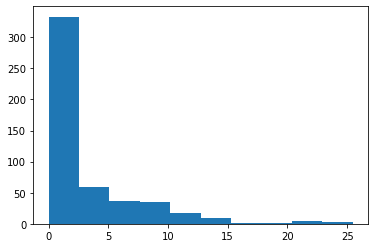

In [442]:
plt.hist(intercept.reshape(500,))

In [443]:
def activity(x, a, b, e):
    return a*x + b + e

In [447]:
df_raw = pd.DataFrame(activity(x = ph.reshape(10,50), a = slope, b = intercept, e = error), index = factor, columns = [f"smaple{i+1}" for i in range(50)]).stack().reset_index()
df_raw.columns = ["treatment", "sample","activity"]
df_raw['ph'] = ph
df_raw = df_raw.set_index(['sample'])

In [448]:
def retrive_sample():
    for sample in df_raw.groupby('sample'):
        yield sample

In [488]:
sample[1]

,treatment,activity,ph,y_hat
sample,,,,
smaple24,1,8.575914,7.170580,12.312441
smaple24,1,13.416564,7.129099,12.008299
smaple24,1,29.264953,7.133984,12.044118
smaple24,1,16.513068,6.938657,10.611970
smaple24,1,11.222969,7.353641,13.654651
smaple24,0,7.439047,7.167824,12.292233
smaple24,0,7.349804,6.861388,10.045432
smaple24,0,6.463312,6.797688,9.578385
smaple24,0,7.664714,6.940182,10.623155


In [489]:
import json

In [25]:
!mkdir samples
json_path = {}
for sample in retrive_sample():
    path = f"samples/{sample[0]}.tsv"
    json_path.update({sample[0]:path}) 
    # sample[1][["treatment", "ph","activity"]].to_csv(path, sep = '\t', index = False)
    
with open("sample_path.json","w") as fo:
    json.dump(json_path,fo)

NameError: name 'retrive_sample' is not defined

In [480]:
for j,i in enumerate(retrive_sample()):
    sample = i
    select = random.randint(1,999)
    
    if (select<j<select+10) and (ttest_ind(x1=sample[1].query('treatment==1')['activity'],x2=sample[1].query('treatment==0')['activity'],alternative = 'larger')[1]<0.05):
        break
        print(j)

<AxesSubplot:xlabel='treatment', ylabel='activity'>

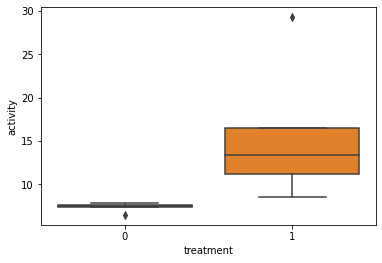

In [481]:
sns.boxplot(x = 'treatment', y = 'activity', data = sample[1])

In [482]:
formula = "activity ~ ph"
lm = ols(formula, sample[1]).fit()
y_hat = lm.predict(sample[1]['ph'])
sample[1]['y_hat'] = y_hat
residual = (sample[1]['activity'] - y_hat)

<AxesSubplot:xlabel='ph', ylabel='activity'>

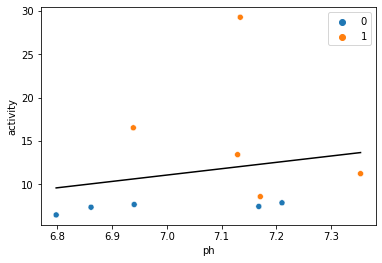

In [483]:
sns.scatterplot(x = 'ph', y = 'activity', hue = 'treatment', data = sample[1])
# sns.lineplot(data=cts, x='X', y='Y',estimator='max', color='red')
sns.lineplot(x = 'ph', y = 'y_hat',estimator='max', color = 'black',data = sample[1].reset_index())

In [484]:
ancova(data = sample[1],dv = 'activity',between="treatment", covar="ph")

,Source,SS,DF,F,p-unc,np2
0,treatment,168.751880,1,4.610232,0.068903,0.397084
1,ph,5.560703,1,0.151916,0.708298,0.021241
2,Residual,256.226388,7,NaN,NaN,NaN


In [499]:
a = ancova(data = sample[1],dv = 'activity',between="treatment", covar="ph")

In [507]:
a.query('Source == "ph"')['p-unc'] < 0.05

1    False
Name: p-unc, dtype: bool

In [485]:
ttest_ind(x1=sample[1].query('treatment==1')['activity'],x2=sample[1].query('treatment==0')['activity'],alternative = 'larger')[1]

0.02394674434183818

In [486]:
ttest_ind(x1=sample[1].query('treatment==1')['y_hat'],x2=sample[1].query('treatment==0')['y_hat'],alternative = 'larger')[1]

0.09700271913911238

In [548]:
!python pep-detective/pep_detective/bin/effect_detector.py -id smaple1 -i samples/smaple1.tsv -p 0.05

Traceback (most recent call last):
  File "/home/jovyan/Documents/jupyter/pep-detective/pep_detective/bin/effect_detector.py", line 59, in <module>
    main(args)
  File "/home/jovyan/Documents/jupyter/pep-detective/pep_detective/bin/effect_detector.py", line 51, in main
    with CovarProcessor(sample_id = args.sample_id, input_path = args.input_file, max_covar_p_value = args.p_value) as samplecovar:
  File "/opt/conda/lib/python3.10/site-packages/pep_detective/src/common.py", line 40, in __init__
    self._open_tsv()
AttributeError: 'CovarProcessor' object has no attribute '_open_tsv'


In [ ]:
"smaple1": "samples/smaple1.tsv"